# Análise exploratória do dataset Iris

## Objetivo

Este notebook tem por objetivo registrar a análise do dataset a fim de identificar a distribuição dos dados, a relação entre as variaveis e exibi-las, no final será apresentado modelos para predição e agrupamento.

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colorbar as colors

RANDOM_STATE = 40

np.random.seed(RANDOM_STATE)


In [2]:
dataset = load_iris()
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["SPECIES"] = dataset.target

In [4]:
df.rename(columns={"sepal length (cm)": "SEPAL_LENGTH", "sepal width (cm)": "SEPAL_WIDTH", "petal length (cm)": "PETAL_LENGTH", "petal width (cm)": "PETAL_WIDTH"}, inplace=True)

df["SEPAL_LENGTH"] = df["SEPAL_LENGTH"].astype("float32")
df["SEPAL_WIDTH"] = df["SEPAL_WIDTH"].astype("float32")
df["PETAL_LENGTH"] = df["PETAL_LENGTH"].astype("float32")
df["PETAL_WIDTH"] = df["PETAL_WIDTH"].astype("float32")
df["SPECIES"] = df["SPECIES"].astype("int32")

In [5]:
df.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEPAL_LENGTH  150 non-null    float32
 1   SEPAL_WIDTH   150 non-null    float32
 2   PETAL_LENGTH  150 non-null    float32
 3   PETAL_WIDTH   150 non-null    float32
 4   SPECIES       150 non-null    int32  
dtypes: float32(4), int32(1)
memory usage: 3.1 KB


In [7]:
df.describe()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843335,3.057333,3.758000,1.199334,1.000000
std,0.828066,0.435866,1.765299,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Analisando 

#### Visualizando a distribuição dos dados de sepala e petala

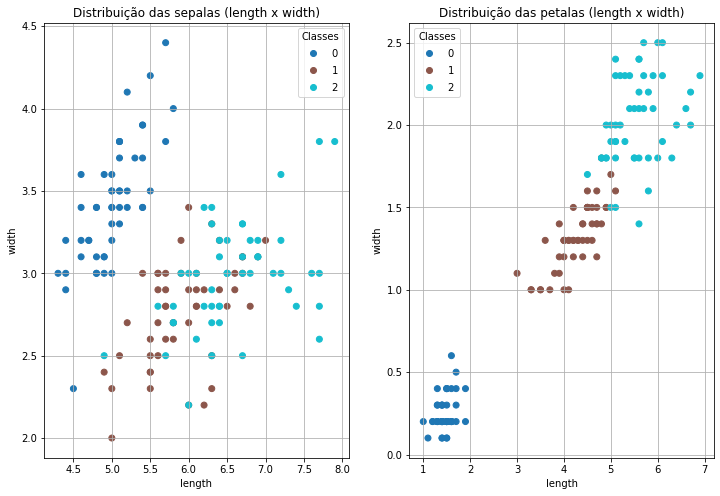

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))

ax[0].set_title("Distribuição das sepalas (length x width)")
scatter0 = ax[0].scatter(df["SEPAL_LENGTH"], df["SEPAL_WIDTH"], c=df["SPECIES"], cmap=plt.get_cmap("tab10"))
ax[0].set_xlabel("length")
ax[0].set_ylabel("width")
ax[0].grid(True)
ax[0].legend(*scatter0.legend_elements(), title="Classes")

ax[1].set_title("Distribuição das petalas (length x width)")
scatter1 = ax[1].scatter(df["PETAL_LENGTH"], df["PETAL_WIDTH"], c=df["SPECIES"], cmap=plt.get_cmap("tab10"))
ax[1].set_xlabel("length")
ax[1].set_ylabel("width")
ax[1].grid(True)
ax[1].legend(*scatter1.legend_elements(), title="Classes")

plt.show()

1. Podemos notar que os dados das sepalas possuem separação bem definida para a classe 1, no entanto as outras duas classes (2 e 3) estão bem misturadas.
2. A distribuição das petalas possuem quase o mesmo padrão, a classe 1 está bem definida e as classes 2 e 3 possuem uma pequena mistura.

### Visualizando correlação

In [9]:
df.corr()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
SEPAL_LENGTH,1.000000,-0.117570,0.871754,0.817941,0.782561
SEPAL_WIDTH,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
PETAL_LENGTH,0.871754,-0.428440,1.000000,0.962865,0.949035
PETAL_WIDTH,0.817941,-0.366126,0.962865,1.000000,0.956547
SPECIES,0.782561,-0.426658,0.949035,0.956547,1.000000


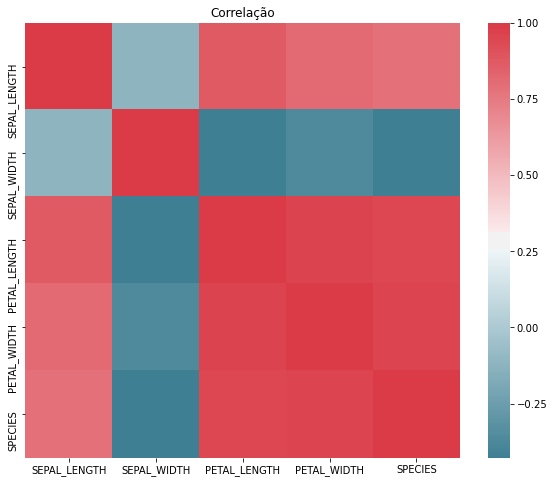

In [10]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
plt.title("Correlação")
sns.heatmap(corr, 
            mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,
            ax=ax)
plt.show()

#### Visualizando outliers

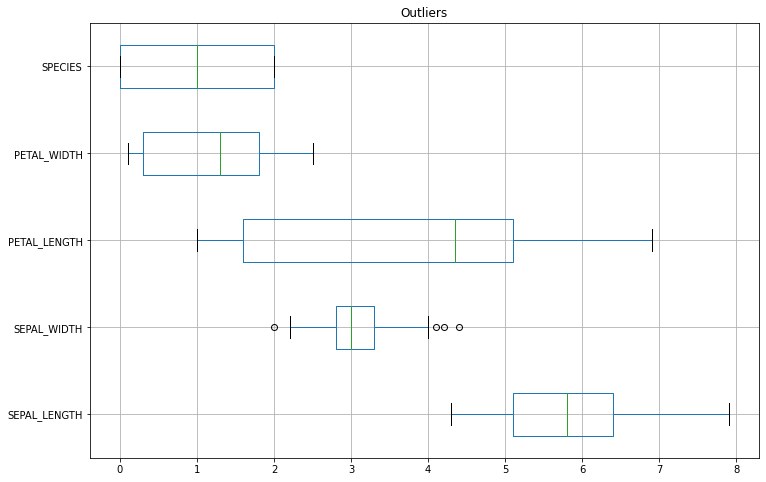

In [11]:
bp = df.boxplot(grid=True, figsize=(12,8), vert=False)

plt.title("Outliers")
plt.show()

## Preparando os dados para predição

In [12]:
x = df[["SEPAL_LENGTH", "SEPAL_WIDTH"]].values
y = df["SPECIES"].values

In [13]:
print(x.shape)
print(y.shape)

(150, 2)
(150,)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import homogeneity_score

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)
print(x_train.shape)
print(y_train.shape)
print('-'*10)
print(pd.value_counts(y_train))
print('-'*10)
print(x_test.shape)
print(y_test.shape)
print('-'*10)
print(pd.value_counts(y_test))

(105, 2)
(105,)
----------
1    36
2    35
0    34
dtype: int64
----------
(45, 2)
(45,)
----------
0    16
2    15
1    14
dtype: int64


### Treinando modelos para validar agrupamento e classificação

#### Cluster

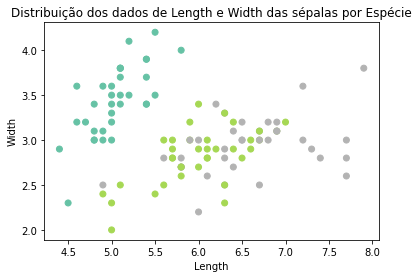

In [16]:
plt.title("Distribuição dos dados de Length e Width das sépalas por Espécie")
plt.xlabel("Length")
plt.ylabel("Width")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='Set2')
plt.show()

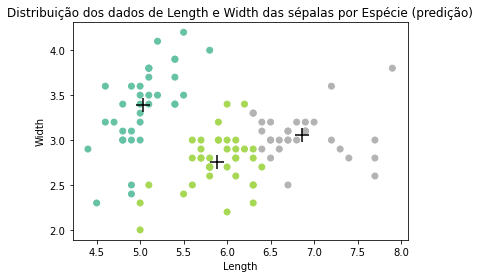

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=len(set(y_train)), random_state=RANDOM_STATE)

kmeans.fit(x_train, y_train)
y_train_predict = kmeans.predict(x_train)

plt.title("Distribuição dos dados de Length e Width das sépalas por Espécie (predição)")
plt.xlabel("Length")
plt.ylabel("Width")
plt.scatter(x_train[:,0], x_train[:,1], c=y_train_predict, cmap='Set2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='+', color='black', s=200)
plt.show()

In [18]:
# Score
print(homogeneity_score(y_train, y_train_predict))

0.5402999064998264


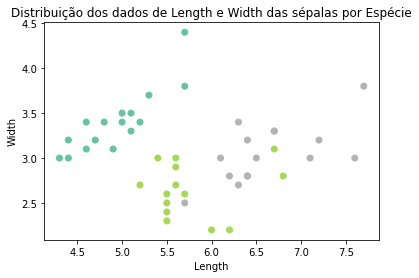

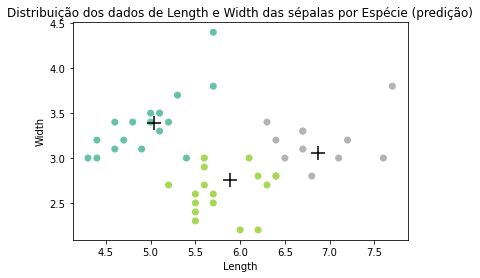

In [19]:
# Validando o conjunto de teste
y_test_predict = kmeans.predict(x_test)

plt.title("Distribuição dos dados de Length e Width das sépalas por Espécie")
plt.xlabel("Length")
plt.ylabel("Width")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='Set2')
plt.show()

plt.title("Distribuição dos dados de Length e Width das sépalas por Espécie (predição)")
plt.xlabel("Length")
plt.ylabel("Width")
plt.scatter(x_test[:,0], x_test[:,1], c=y_test_predict, cmap='Set2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='+', color='black', s=200)
plt.show()

In [20]:
# Score
print(homogeneity_score(y_test, y_test_predict))

0.5937690537957429


#### Classificação

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
x = df[["SEPAL_LENGTH","SEPAL_WIDTH", "PETAL_LENGTH", "PETAL_WIDTH"]].values
y = df["SPECIES"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

##### SGDBClassifier


In [22]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state=RANDOM_STATE)
model.fit(x_train, y_train)

y_train_predict = model.predict(x_train)

print('')
print('confusion matrix')
print(confusion_matrix(y_train, y_train_predict))

print('')
print('accuracy score')
print(accuracy_score(y_train, y_train_predict))

print('')
print('f1 score')
print(f1_score(y_train, y_train_predict, average='weighted'))


confusion matrix
[[33  0  0]
 [10  1 29]
 [ 0  0 32]]

accuracy score
0.6285714285714286

f1 score
0.501243996432203


In [23]:
y_test_predict = model.predict(x_test)

print('')
print('confusion matrix')
print(confusion_matrix(y_test, y_test_predict))

print('')
print('accuracy score')
print(accuracy_score(y_test, y_test_predict))

print('')
print('f1 score')
print(f1_score(y_test, y_test_predict, average='weighted'))


confusion matrix
[[17  0  0]
 [ 3  0  7]
 [ 0  0 18]]

accuracy score
0.7777777777777778

f1 score
0.6820308680773797


##### RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=RANDOM_STATE)
model.fit(x_train, y_train)

y_train_predict = model.predict(x_train)

print('')
print('confusion matrix')
print(confusion_matrix(y_train, y_train_predict))

print('')
print('accuracy score')
print(accuracy_score(y_train, y_train_predict))

print('')
print('f1 score')
print(f1_score(y_train, y_train_predict, average='weighted'))


confusion matrix
[[33  0  0]
 [ 0 40  0]
 [ 0  0 32]]

accuracy score
1.0

f1 score
1.0


In [25]:
y_test_predict = model.predict(x_test)

print('')
print('confusion matrix')
print(confusion_matrix(y_test, y_test_predict))

print('')
print('accuracy score')
print(accuracy_score(y_test, y_test_predict))

print('')
print('f1 score')
print(f1_score(y_test, y_test_predict, average='weighted'))


confusion matrix
[[17  0  0]
 [ 0  9  1]
 [ 0  1 17]]

accuracy score
0.9555555555555556

f1 score
0.9555555555555556


#### Naive Bayes


In [26]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)

y_train_predict = model.predict(x_train)

print('')
print('confusion matrix')
print(confusion_matrix(y_train, y_train_predict))

print('')
print('accuracy score')
print(accuracy_score(y_train, y_train_predict))

print('')
print('f1 score')
print(f1_score(y_train, y_train_predict, average='weighted'))


confusion matrix
[[33  0  0]
 [ 0 38  2]
 [ 0  2 30]]

accuracy score
0.9619047619047619

f1 score
0.9619047619047619


In [27]:
y_test_predict = model.predict(x_test)

print('')
print('confusion matrix')
print(confusion_matrix(y_test, y_test_predict))

print('')
print('accuracy score')
print(accuracy_score(y_test, y_test_predict))

print('')
print('f1 score')
print(f1_score(y_test, y_test_predict, average='weighted'))


confusion matrix
[[17  0  0]
 [ 0 10  0]
 [ 0  1 17]]

accuracy score
0.9777777777777777

f1 score
0.9779894179894181
